In [1]:
import pymc3 as pm
import numpy as np
from numpy import random
import pylab as plt
import warnings
from sklearn import datasets, linear_model
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
x, y = datasets.make_regression(
    n_samples=100, 
    n_features=40, 
    n_informative=10,
    random_state=123
)

In [4]:
with pm.Model() as model:
    a = pm.Normal('a', 0, 100, shape = 40)
    b = pm.Normal('b', 0, 100)
    sd = pm.Gamma('sd', 1, 1)
    
    yw = pm.Normal('y', pm.math.dot(x, a)+b, sd, observed = y)
    
    step = pm.NUTS()
    trace = pm.sample(2000, step=step)

100%|██████████| 2000/2000 [00:12<00:00, 166.05it/s]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def plot_kde(data):
    # generated a density class
    density = gaussian_kde(data)

    # generate a fake range of x values
    xs = np.arange(min(data),max(data), (max(data) - min(data)) / 100)

    # fill y values using density class
    ys = density(xs)

    plt.plot(xs, ys, antialiased=True)
    plt.show()

0


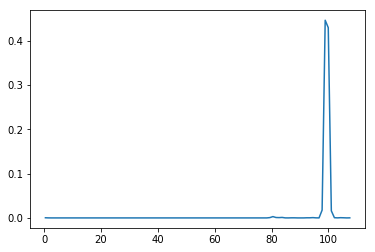

1


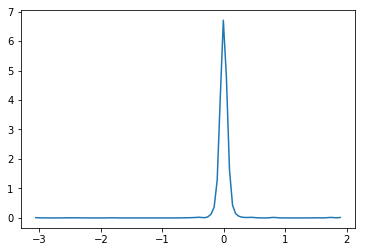

2


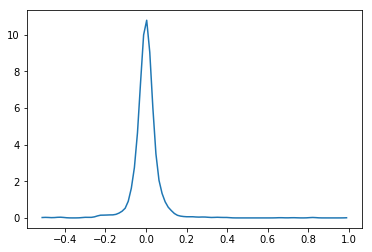

3


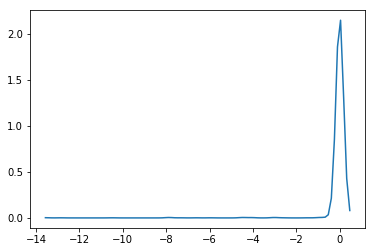

4


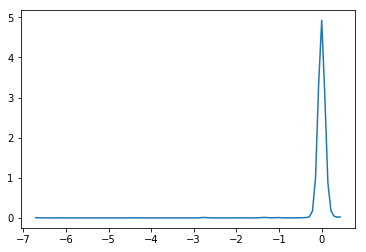

5


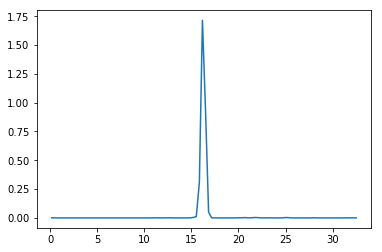

6


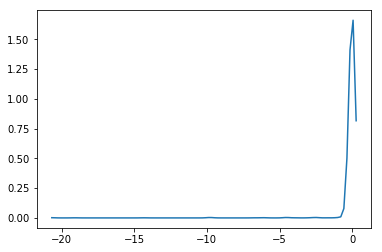

7


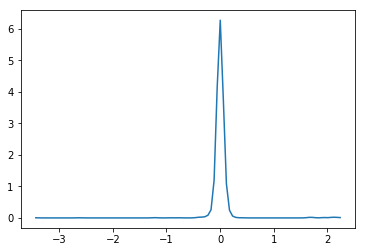

8


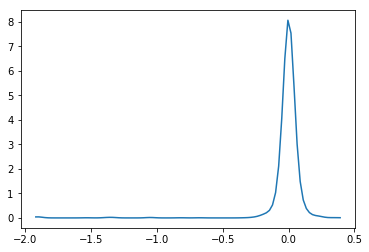

9


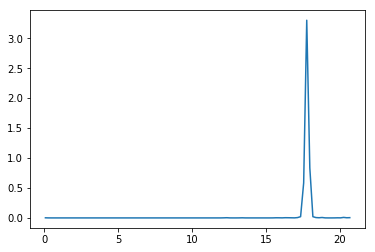

10


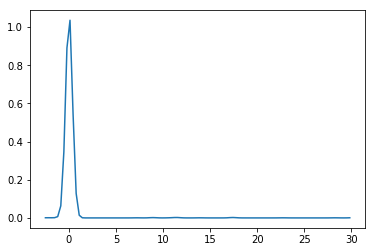

11


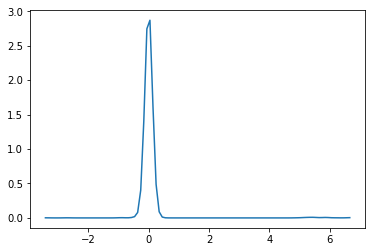

12


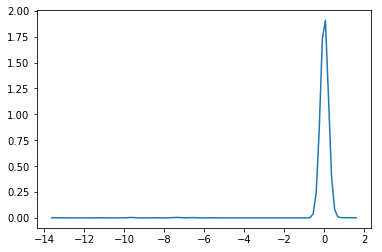

13


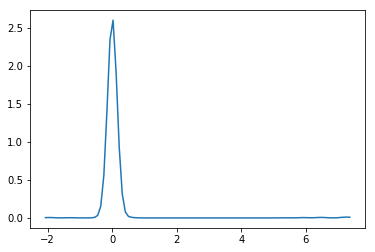

14


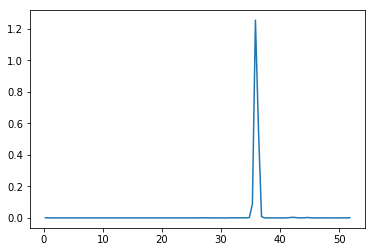

15


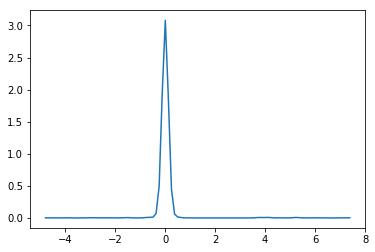

16


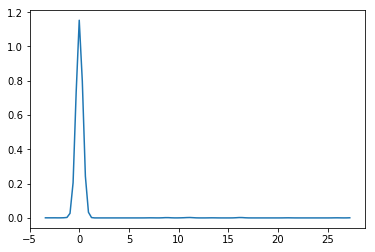

17


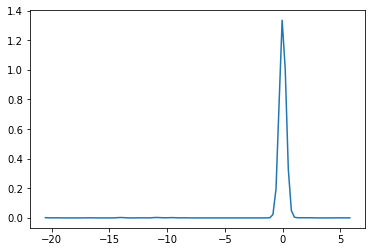

18


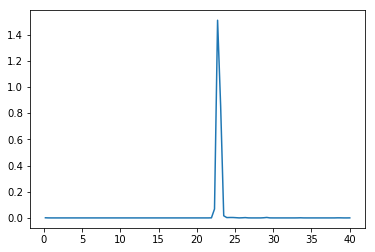

19


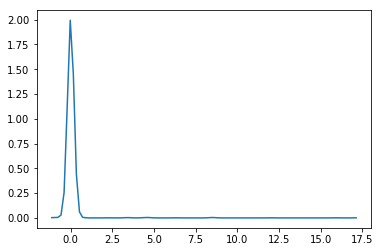

20


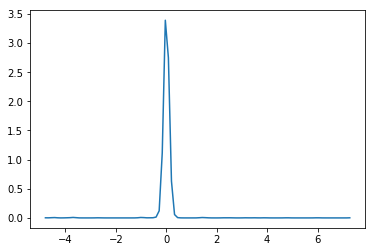

21


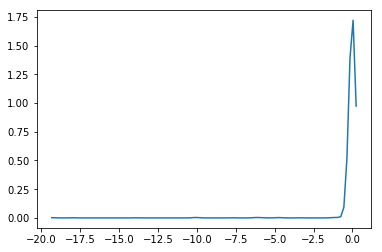

22


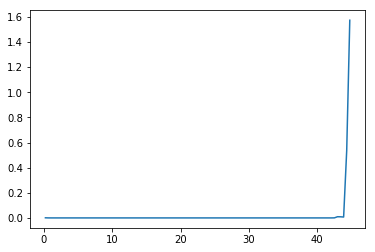

23


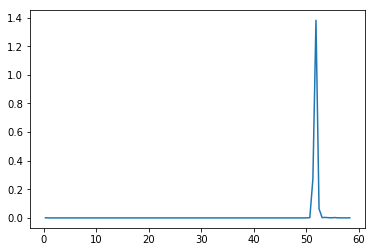

24


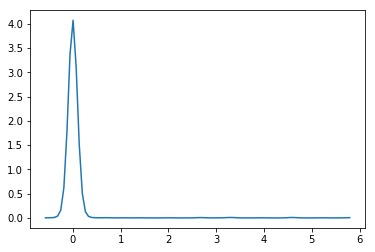

25


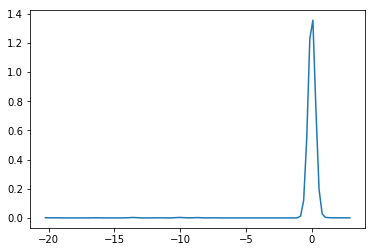

26


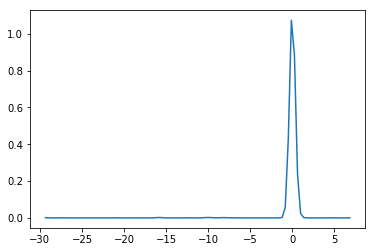

27


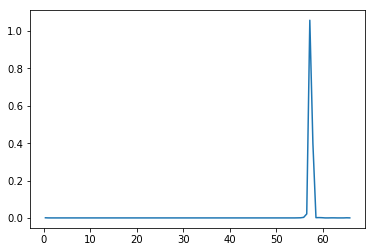

28


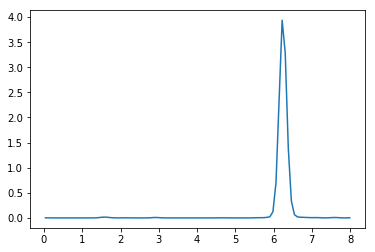

29


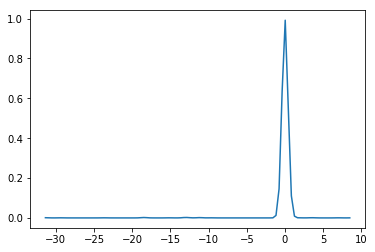

30


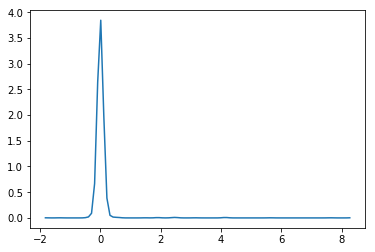

31


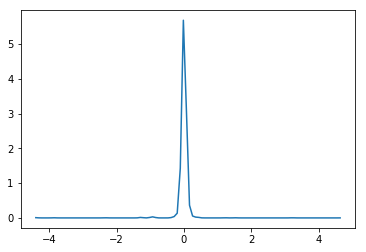

32


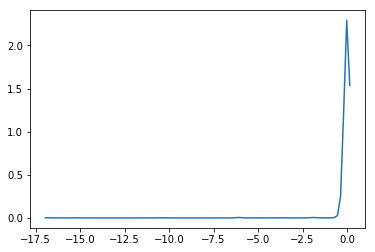

33


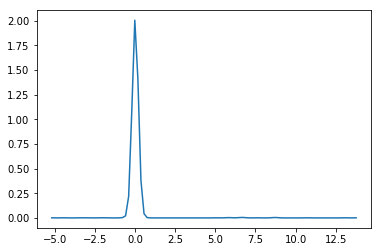

34


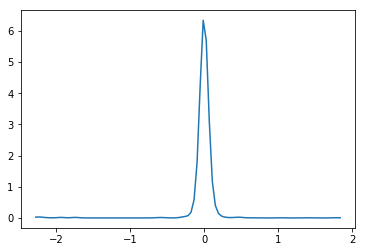

35


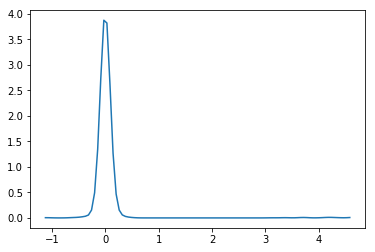

36


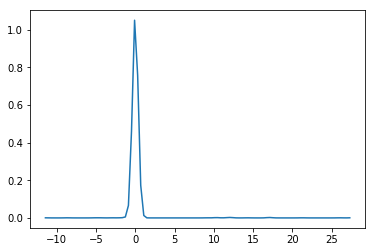

37


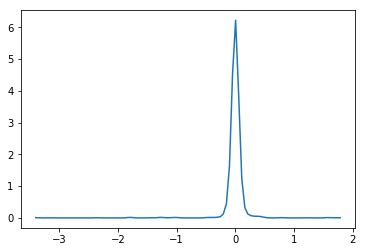

38


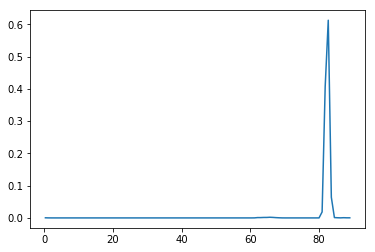

39


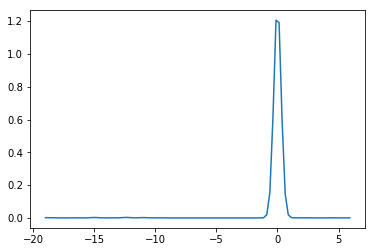

In [9]:
for i in range(40):
    print(i)
    plot_kde(trace['a'][:,i])